In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df=pd.read_csv('Master_data.csv')
df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,profit/km,day_of_week,month,year
270483,10332097,2018-05-29,Yellow Cab,CHICAGO IL,22.31,356.77,315.9096,3477,Card,Male,22,33853,1955130,164468,40.8604,1.831484,Tuesday,May,2018
114474,10140370,2017-01-30,Yellow Cab,CHICAGO IL,35.00,601.29,441.0000,3928,Card,Male,41,11038,1955130,164468,160.2900,4.579714,Monday,January,2017
28311,10035928,2016-05-22,Yellow Cab,WASHINGTON DC,8.40,133.36,105.8400,51617,Cash,Female,44,6384,418859,127001,27.5200,3.276190,Sunday,May,2016
41715,10052777,2016-07-17,Yellow Cab,LOS ANGELES CA,9.50,153.30,116.2800,6488,Card,Male,61,4782,1595037,144132,37.0200,3.896842,Sunday,July,2016
185559,10228096,2017-09-19,Yellow Cab,NEW YORK NY,23.32,648.99,335.8080,1765,Cash,Male,59,4127,8405837,302149,313.1820,13.429760,Tuesday,September,2017


In [5]:
print(df.shape)
df.info()

(359392, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  profit              359392 non-null  float64
 15  profit/km           3

### Compare Yellow Cab and Pink Cab from Different Aspects

### What's the profit rate of Cab market? Which company has higher profit rate?

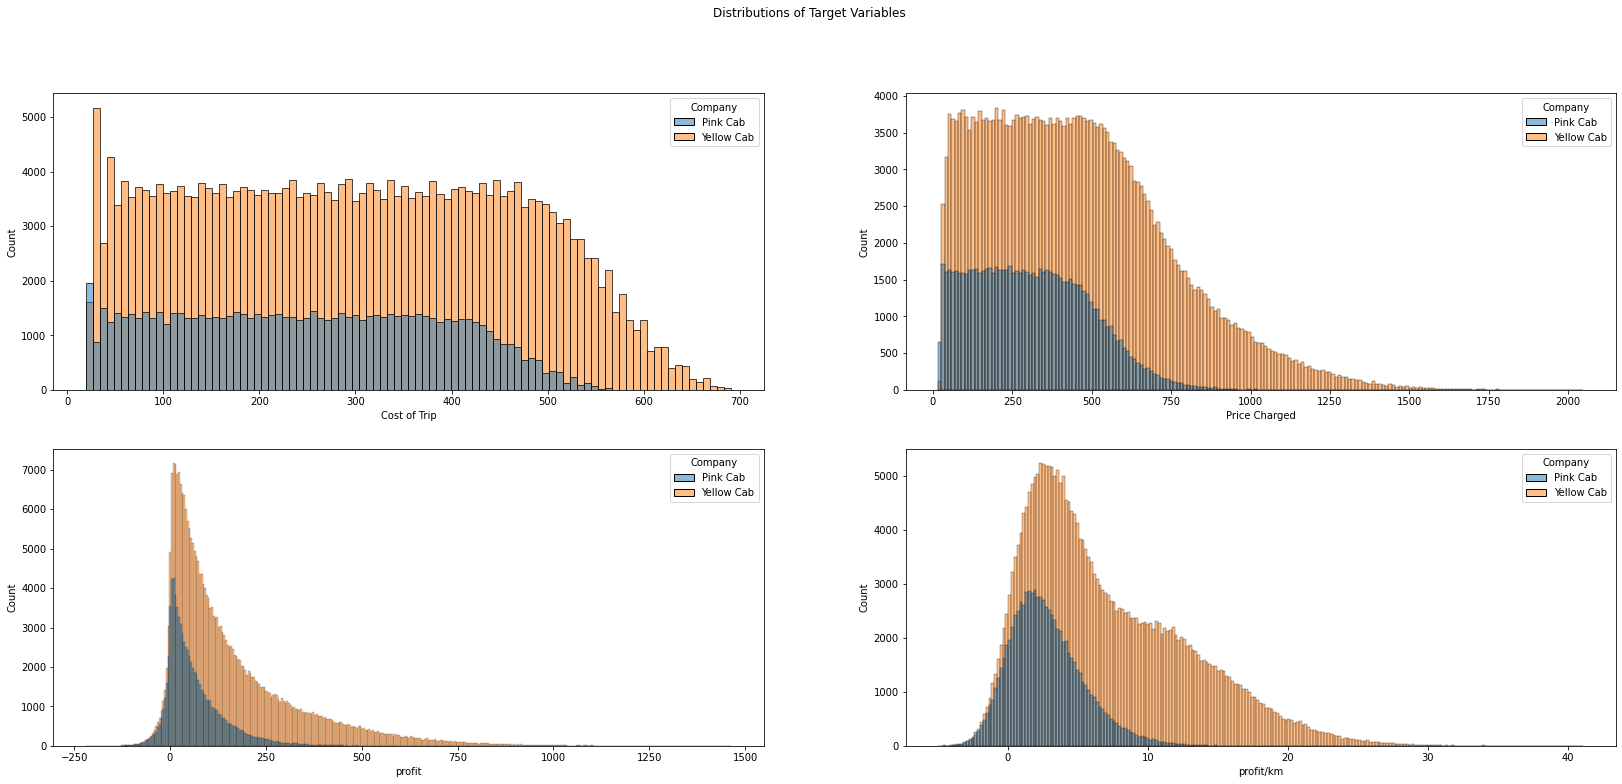

In [30]:
plt.figure(figsize=[28, 12])

plt.subplot(2, 2, 1)
plt.suptitle('Distributions of Target Variables')
sns.histplot(data=df , x='Cost of Trip' , hue="Company")

plt.subplot(2, 2, 2)
sns.histplot(data=df , x='Price Charged' , hue="Company")

plt.subplot(2, 2, 3)
sns.histplot(data=df , x='profit' , hue="Company")

plt.subplot(2, 2, 4)
sns.histplot(data=df , x='profit/km' , hue="Company");

- From the above plots we can observe that profit distribution is skewed to the right. Also, it can be noted that Yellow cab consistently have higher prices hence higher profits as compared to Pink Cab.  
- It is also interesting to see Pink cab has a longer distribution below 0 which implies more loses.

### Which Taxi Cab has the bigger market Share

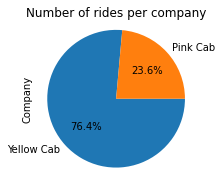

<AxesSubplot:xlabel='Company', ylabel='profit'>

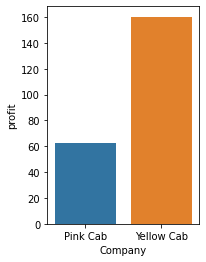

In [50]:
labels=['Pink Cab', 'Yellow Cab']

plt.subplot(1, 2, 1)
company = df['Company'].value_counts()
company.plot(kind='pie', autopct='%1.1f%%', counterclock = False)
plt.axis('square')
plt.title('Number of rides per company')
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Company', y='profit', ci=None)